In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('saskatoon-airport-1892-2007.csv')

In [4]:
cut_off_year = 1970

before = df[df['Year']<= cut_off_year].groupby('Month')['Mean Temp (C)'].mean()

after = df[df['Year']> cut_off_year].groupby('Month')['Mean Temp (C)'].mean()


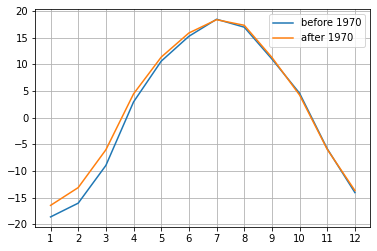

In [5]:
plt.plot(before.index, before, label = f"before {cut_off_year}")
plt.plot(after.index, after, label = f"after {cut_off_year}")
plt.legend()
plt.grid()
plt.xticks(range(1,13))
plt.show()

In [17]:
from scipy.stats import stats
start_year = df['Year'].values[0]
end_year = df["Year"].values[-1]
cut_off_year_list = [1970]
for cut_off_year in cut_off_year_list:
    (t, p) = stats.ttest_ind(df.loc[ (df['Year'] < cut_off_year) & (df['Month'] == 1), 'Mean Temp (C)'].dropna(),
                    df.loc[ (df['Year'] > cut_off_year) & (df['Month'] == 1), 'Mean Temp (C)'].dropna())
    if p < 0.05:
        result = "significant change"
    else:
        result = "non-significant change"
    print(f"{start_year}~{cut_off_year} and {cut_off_year}~{end_year}, p_value: {p}, {result}")

1892~1980 and 1980~2007, p_value: 0.002649858530094199, significant change
